### Import Packages

In [1]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import glob
import geopandas
from geopandas import GeoDataFrame

### Import Data

In [2]:
#Climate TRACE Data
path = '/Users/lschmeisser/RMI/'
climatetrace = pd.read_csv(path+'Climate Aligned Industries - WasteMAP/2. Workstream/Platform Development/Data/Data download/Climate TRACE/country_solid-waste-disposal_emissions.csv')

In [3]:
#UNFCCC Data
unfccc_path = path + 'Climate Aligned Industries - WasteMAP/2. Workstream/Platform Development/Data/Data download/UNFCCC/'
unfccc_files = sorted(glob.glob(unfccc_path + '*.xlsx'))

li = []

for f in unfccc_files:
    
    # read the csv file
    df = pd.read_excel(f, sheet_name = 'Data_by_sector')
    df['Country'] = f.split('/')[-1][0:3]
    df['CODE'] = f.split('/')[-1][0:3]
    df = df.iloc[[47,48,49,50,51,52],:]
    li.append(df)
    
unfccc = pd.concat(li, axis=0, ignore_index=True)
# unfccc = frame.drop('1990.1', axis=1)

In [4]:
waste_total = unfccc[unfccc['GHG emissions, kt CO2 equivalent'] == '5. Waste']
solid_waste_disposal = unfccc[unfccc['GHG emissions, kt CO2 equivalent'] == '5.A. Solid Waste Disposal']
bio_treatment_of_solid_waste = unfccc[unfccc['GHG emissions, kt CO2 equivalent'] == '5.B. Biological Treatment of Solid Waste']
incineration = unfccc[unfccc['GHG emissions, kt CO2 equivalent'] == '5.C. Incineration and Open Burning of Waste']
wastewater = unfccc[unfccc['GHG emissions, kt CO2 equivalent'] == '5.D. Wastewater Treatment and Discharge']
other = unfccc[unfccc['GHG emissions, kt CO2 equivalent'] == '5.E. Other']

### Visualize UNFCCC Data

In [5]:
#Read in world data from geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
#Merge country information from world dataset with methane intensity dataset
unfccc_world = solid_waste_disposal.merge(world, how="inner", left_on=['CODE'], right_on=['iso_a3'])

In [8]:
#Convert merged dataframe back into a geodataframe
unfccc_world = GeoDataFrame(unfccc_world)

In [9]:
#Make emissions column into float
unfccc_world['2020'] = unfccc_world['2020'].astype(float)

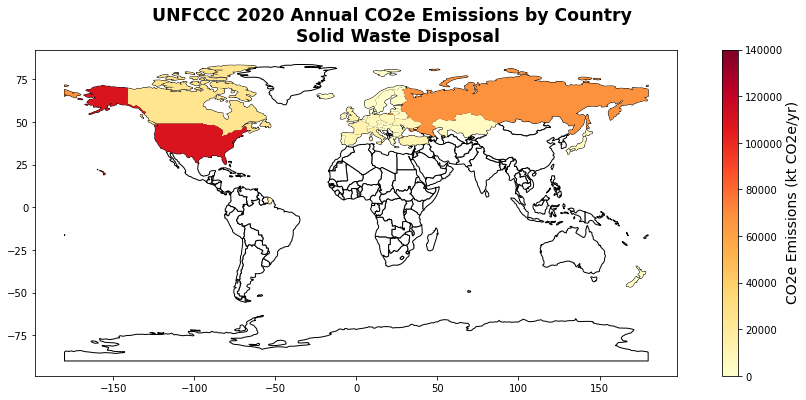

In [17]:
#Plot map of CO2e emissions by country
fig, ax = plt.subplots(figsize = (16,6))
fig.suptitle('UNFCCC 2020 Annual CO2e Emissions by Country \n Solid Waste Disposal', fontsize = 'xx-large', fontweight = 'bold')
world.plot(ax = ax, color = 'white', edgecolor = 'black' )
unfccc_world.plot(column = '2020', cmap = 'YlOrRd', ax = ax, legend = True, vmin=0, vmax=140000)
plt.text(0.839, 0.3, 'CO2e Emissions (kt CO2e/yr)', rotation = 90,fontsize=14, transform=plt.gcf().transFigure)
plt.show()

### Climate TRACE visualization

In [11]:
climatetrace2020 = climatetrace[climatetrace['start_time'] == '2020-01-01 00:00:00']
climatetrace2020_co2e20yr = climatetrace2020[climatetrace2020['gas'] == 'co2e_20yr']
climatetrace2020_co2e100yr = climatetrace2020[climatetrace2020['gas'] == 'co2e_100yr']

#Convert emissions quantity from tonnes/yr to ktonnes/yr
climatetrace2020_co2e20yr['emissions_quantity'] = climatetrace2020_co2e20yr['emissions_quantity']/1000
climatetrace2020_co2e20yr['emissions_quantity_units'] = 'ktonnes'

climatetrace2020_co2e100yr['emissions_quantity'] = climatetrace2020_co2e100yr['emissions_quantity']/1000
climatetrace2020_co2e100yr['emissions_quantity_units'] = 'ktonnes'

/var/folders/my/g3v314zs32gdmz046c_wf3m40000gp/T/ipykernel_16858/4058833165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatetrace2020_co2e20yr['emissions_quantity'] = climatetrace2020_co2e20yr['emissions_quantity']/1000
/var/folders/my/g3v314zs32gdmz046c_wf3m40000gp/T/ipykernel_16858/4058833165.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatetrace2020_co2e20yr['emissions_quantity_units'] = 'ktonnes'
/var/folders/my/g3v314zs32gdmz046c_wf3m40000gp/T/ipykernel_16858/4058833165.py:9: Setti

In [12]:
#Merge country information from world dataset with methane intensity dataset
climatetrace_world20yr = climatetrace2020_co2e20yr.merge(world, how="inner", left_on=['iso3_country'], right_on=['iso_a3'])
climatetrace_world100yr = climatetrace2020_co2e100yr.merge(world, how="inner", left_on=['iso3_country'], right_on=['iso_a3'])

In [13]:
#Convert merged dataframe back into a geodataframe
climatetrace_world20yr = GeoDataFrame(climatetrace_world20yr)
climatetrace_world100yr = GeoDataFrame(climatetrace_world100yr)

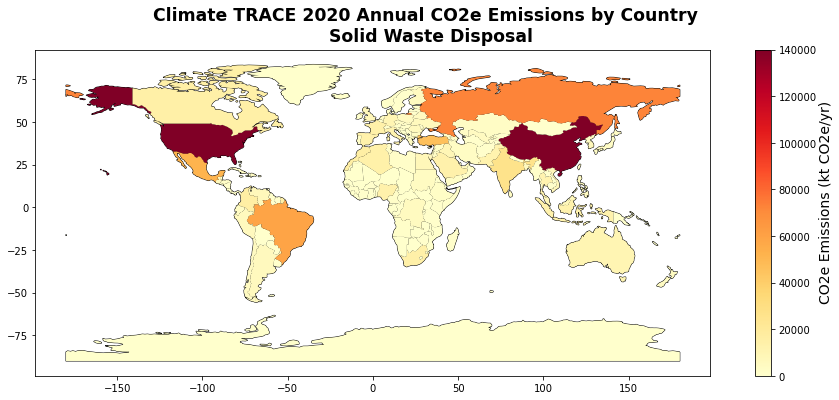

In [16]:
#Plot map of CO2e emissions by country
fig, ax = plt.subplots(figsize = (16,6))
fig.suptitle('Climate TRACE 2020 Annual CO2e Emissions by Country \n Solid Waste Disposal', fontsize = 'xx-large', fontweight = 'bold')
world.plot(ax = ax, color = 'white', edgecolor = 'black')
climatetrace_world100yr.plot(column = 'emissions_quantity', cmap = 'YlOrRd', ax = ax, legend = True, vmin=0, vmax=140000)

plt.text(0.839, 0.3, 'CO2e Emissions (kt CO2e/yr)', rotation = 90,fontsize=14, transform=plt.gcf().transFigure)
plt.show()